In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [3]:
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [4]:
len(x_train)

60000

In [5]:
len(y_train)

60000

In [6]:
len(x_test)

10000

In [7]:
len(y_test)

10000

In [8]:
x_test.shape

(10000, 28, 28)

In [9]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

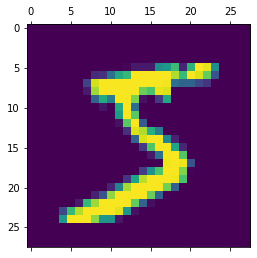

In [41]:
plt.matshow(x_train[0])

In [42]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [22]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(optimizer='sgd',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [27]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 14.4733 - accuracy: 0.2675 - val_loss: 2.0513 - val_accuracy: 0.2059
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.9796 - accuracy: 0.2531 - val_loss: 1.9780 - val_accuracy: 0.2438
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.9737 - accuracy: 0.2404 - val_loss: 2.0435 - val_accuracy: 0.2042
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.0277 - accuracy: 0.2340 - val_loss: 2.0249 - val_accuracy: 0.2092
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.9586 - accuracy: 0.2437 - val_loss: 1.9081 - val_accuracy: 0.2509
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.9795 - accuracy: 0.2456 - val_loss: 1.8737 - val_accuracy: 0.2749
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.9011 - accuracy: 0.2659 - val_loss: 1.9481 - val_accuracy

In [28]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 1.7565 - accuracy: 0.3195
Loss=1.757
Accuracy=0.319


<function matplotlib.pyplot.show(*args, **kw)>

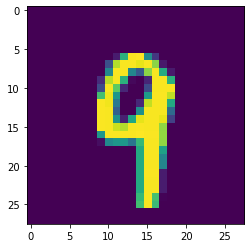

In [30]:
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show

In [33]:
predicted_value=model.predict(x_test)
print("Handwritten number in the image is = %d" %np.argmax(predicted_value))

313/313 [==============================] - 0s 916us/step
Handwritten number in the image is = 7


In [34]:
get_ipython().run_line_magic('pinfo2','history.history')
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

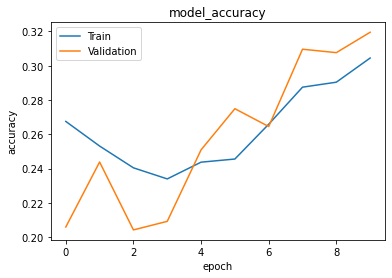

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

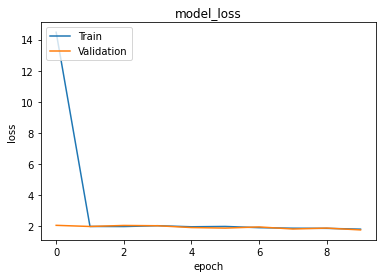

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

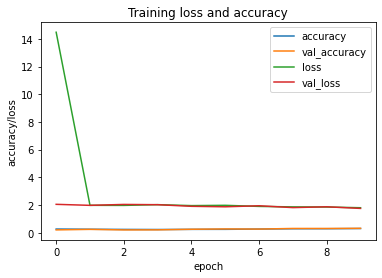

In [38]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training loss and accuracy')
plt.ylabel('accuracy/loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy', 'loss', 'val_loss'])
plt.show()

In [39]:
keras_model_path="/content/sample_data"
model.save(keras_model_path)

INFO:tensorflow:Assets written to: /content/sample_data\assets


In [40]:
restored_keras_model= tf.keras.models.load_model(keras_model_path)